# <a href="https://colab.research.google.com/github/tvml/ml2021/blob/main/codici/BetaBernoulli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sequenza di plot della distribuzione a posteriori del parametro di una distribuzione di Bernoulli al crescere del numero di osservazioni (lanci di moneta)

In [1]:
#%matplotlib inline
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
#!pip install xarray
import xarray

In [3]:
plt.style.use('ggplot')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

Fissa la probabilità $\theta$ di esito pari a $1$ e i numeri di osservazioni da considerare

In [4]:
theta_real = 0.26
n_trials = 100000

Genera la sequenza casuale di risultati derivanti da lanci ripetuti con probabilità di $1$ pari a $\theta$

In [5]:
data = stats.bernoulli.rvs(theta_real, size=n_trials)

In [6]:
data[:20]

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0])

Fissa la distribuzione a priori del parametro $\theta$. Si utilizza un modello Beta-Bernoulli, per cui la prior (e di conseguenza la posterior) sono distribuzioni Beta. 

![Diagramma modello beta-bernoulli.](assets/betabernoulli.png)

In [7]:
# dichiara la distribuzione prior
dist = stats.beta
# valori dei suoi parametri
alpha = 20
beta = 10
hyper = [alpha, beta]

Calcola i valori della densità di probabilità a priori su una griglia ($1$-dimensionale) di punti

In [8]:
# fissa l'insieme dei valori sui quali calcolare la distribuzione
nv = 10000
x = np.linspace(0, 1, nv)
# calcola i valori di densità di probabilità per tutti i punti dell'insieme
yp = dist.pdf(x,*hyper)

Plot della distribuzione a priori di $\theta$

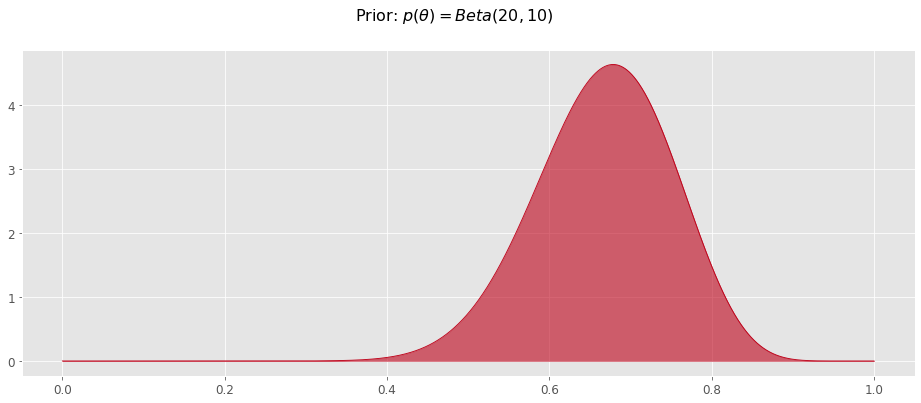

In [9]:
fig, ax = plt.subplots(figsize=(16,6))
ax=plt.subplot(1,1,1)
ax.plot(x, yp, '-', c=colors[7], linewidth=0.9, alpha=1, label="prior")
ax.fill_between(x, 0, yp, color=colors[7], alpha=0.6)
# testo sull'asse x
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout
# titolo della figura
plt.suptitle(r'Prior: $p(\theta)=Beta({0:3d}, {1:3d})$'.format(alpha, beta), fontsize=16)
plt.show()

Per ogni numero di osservazioni fissato, determina il numero di valori $1$ osservati, calcola i parametri della distribuzione a posteriori risultante e memorizza il valore della verosimiglianza e della densità di probabilità per tutti i punti della griglia.

In [10]:
n = 500

In [11]:
# determina numero di esiti pari a 1
ones = data[:n].sum()
# modifica i parametri della distribuzione per tener conto degli esiti osservati
params = [sum(t) for t in zip(hyper, [ones, n-ones])]
# calcola elenco dei valori per la distribuzione a posteriori con i parametri calcolati
post = dist.pdf(x, *params)
# calcola il valore sulla griglia per cui la distribuzione a posteriori è massima
mp = x[np.argmax(post)]
# calcola elenco dei valori per la verosimiglianza con la probabilità considerata
lik = [p**ones*(1-p)**(n-ones) for p in x]
# calcola il valore sulla griglia per cui la verosimiglianza è massima
ml = x[np.argmax(lik)]
# calcola il valore dell'evidenza
ev = np.sum(list(map(lambda x,y:x*y/float(nv), lik, yp)))

Visualizza la distribuzione a priori, la verosimiglianza e la distribuzione a posteriori per il numero di osservazioni considerato

In [12]:
def plot_dist():
    fig, (ax1, ax2) = plt.subplots(2,1,sharex=True, figsize=(16,10))
    ax1.plot(x, lik, '-', c=colors[1], linewidth=0.9, alpha=0.8)
    # riempie la zona compresa tra la curva e l'asse x
    ax1.fill_between(x, 0, lik, color=colors[1], alpha=0.3)
    # testo sull'asse x
    plt.xlabel(r"$\theta$",fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    ax1.set_title(r'Likelihood; $L(\theta|X)=\theta^{%3d}(1-\theta)^{%3d}\qquad$ ML=%8.5f'%(ones, n-ones, ml), fontsize=14)
    plt.tight_layout
    # effettua il plot a partire dalla sequenza di ascisse in x e di ordinate calcolate e salvate 
    # nell'elemento attuale di ys
    ax2.plot(x, post, '-', c=colors[3], linewidth=0.9, alpha=1)
    # riempie la zona compresa tra la curva e l'asse x
    ax2.fill_between(x, 0, post, color=colors[3], alpha=0.6)
    # effettua il plot del prior a partire dalla sequenza di ascisse in x e di ordinate calcolate e salvate in yp
    ax2.plot(x, yp, '-', c=colors[7], linewidth=0.9, alpha=1, label="prior")
     # riempie la zona compresa tra la curva e l'asse x
    ax2.fill_between(x, 0, yp, color=colors[7], alpha=0.6)
    plt.annotate(r'Evidence; $p(X)={0:10.3e}$'.format(ev), xy=(.05, .85), va='top', xycoords='axes fraction', 
                 fontsize=10)
    # testo sull'asse x
    plt.xlabel(r'$\theta$', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(r'Posterior; $p(\theta|X)=Beta({0:3d}, {1:3d})\qquad$ MAP={2:8.5f}'.format(params[0],params[1],mp), fontsize=14)
    plt.tight_layout
    # titolo della figura
    plt.suptitle(r'$\theta={0:3.2f}\qquad n={1:3d}\qquad\#1={2:3d}\quad \#0={3:3d}$'.format(theta_real, 
                                                    n, ones, n-ones), fontsize=16)
    plt.show()

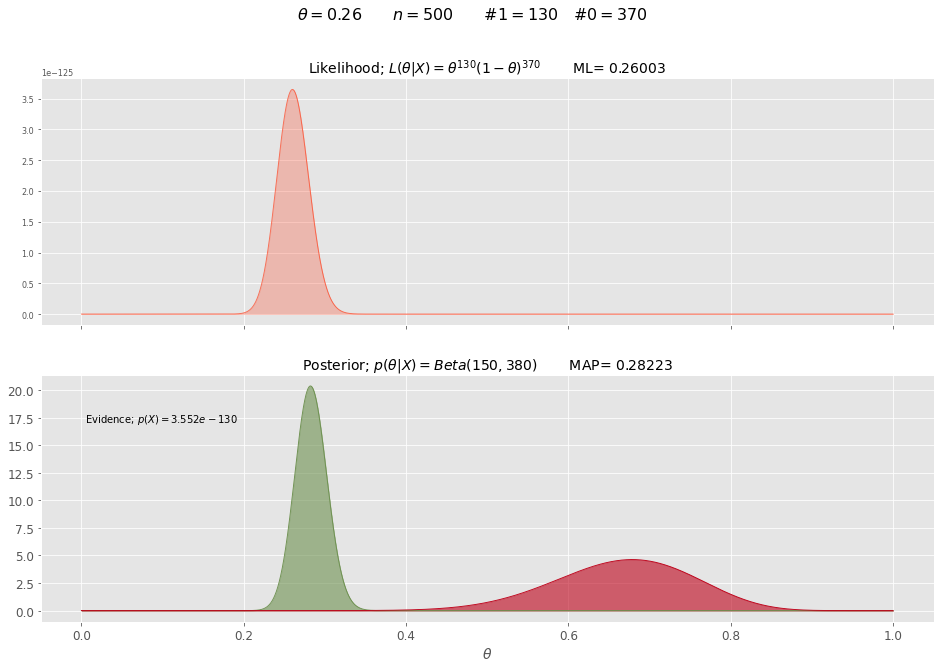

In [21]:
plot_dist()